<a href="https://colab.research.google.com/github/ibrahimbal43/ibrahim_bal-_Dsa210_project/blob/main/python_dsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import kagglehub
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# FIFA 23
path_fifa = kagglehub.dataset_download("stefanoleone992/fifa-23-complete-player-dataset")
print("FIFA path:", path_fifa)
print(os.listdir(path_fifa))




100%|██████████| 1.58G/1.58G [00:18<00:00, 90.5MB/s]

Extracting files...


FIFA path: /root/.cache/kagglehub/datasets/stefanoleone992/fifa-23-complete-player-dataset/versions/1
['female_coaches.csv', 'male_players (legacy).csv', 'female_teams.csv', 'female_players.csv', 'male_players.csv', 'male_teams.csv', 'female_players (legacy).csv', 'male_coaches.csv']


In [4]:


# 1) FIFA 23 dataset indirme
path_fifa = kagglehub.dataset_download("stefanoleone992/fifa-23-complete-player-dataset")
print("FIFA path:", path_fifa)
print(os.listdir(path_fifa))

# 2) FIFA male_players.csv dosyasını yükleme
use_cols = [
    "short_name", "long_name", "age",
    "height_cm", "weight_kg",
    "overall", "potential", "physic",
    "value_eur"
]

df_fifa = pd.read_csv(os.path.join(path_fifa, "male_players.csv"),
                      usecols=use_cols)

# ⬇⬇⬇ TAM BU SATIRA EKLE ⬇⬇⬇

df = df_fifa.copy()

# ⬆⬆⬆ Burası DOĞRU yer ⬆⬆⬆

# 3) Temizlik
df = df.dropna(subset=["value_eur", "height_cm", "weight_kg",
                       "potential", "overall", "physic"])

df = df[(df["height_cm"] > 0) & (df["weight_kg"] > 0)]

# 4) Feature engineering
df["market_value"] = df["value_eur"]
df["physical_index"] = df["height_cm"] * df["weight_kg"]
df["bmi"] = df["weight_kg"] / ((df["height_cm"]/100)**2)

df.head()


FIFA path: /root/.cache/kagglehub/datasets/stefanoleone992/fifa-23-complete-player-dataset/versions/1
['female_coaches.csv', 'male_players (legacy).csv', 'female_teams.csv', 'female_players.csv', 'male_players.csv', 'male_teams.csv', 'female_players (legacy).csv', 'male_coaches.csv']


,short_name,long_name,overall,potential,value_eur,age,height_cm,weight_kg,physic,market_value,physical_index,bmi
0,L. Messi,Lionel Andrés Messi Cuccittini,91,91,54000000.0,35,169,67,64.0,54000000.0,11323,23.458562
1,K. Benzema,Karim Benzema,91,91,64000000.0,34,185,81,78.0,64000000.0,14985,23.666910
2,R. Lewandowski,Robert Lewandowski,91,91,84000000.0,33,185,81,83.0,84000000.0,14985,23.666910
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000.0,31,181,75,77.0,107500000.0,13575,22.893074
4,K. Mbappé,Kylian Mbappé Lottin,91,95,190500000.0,23,182,73,76.0,190500000.0,13286,22.038401


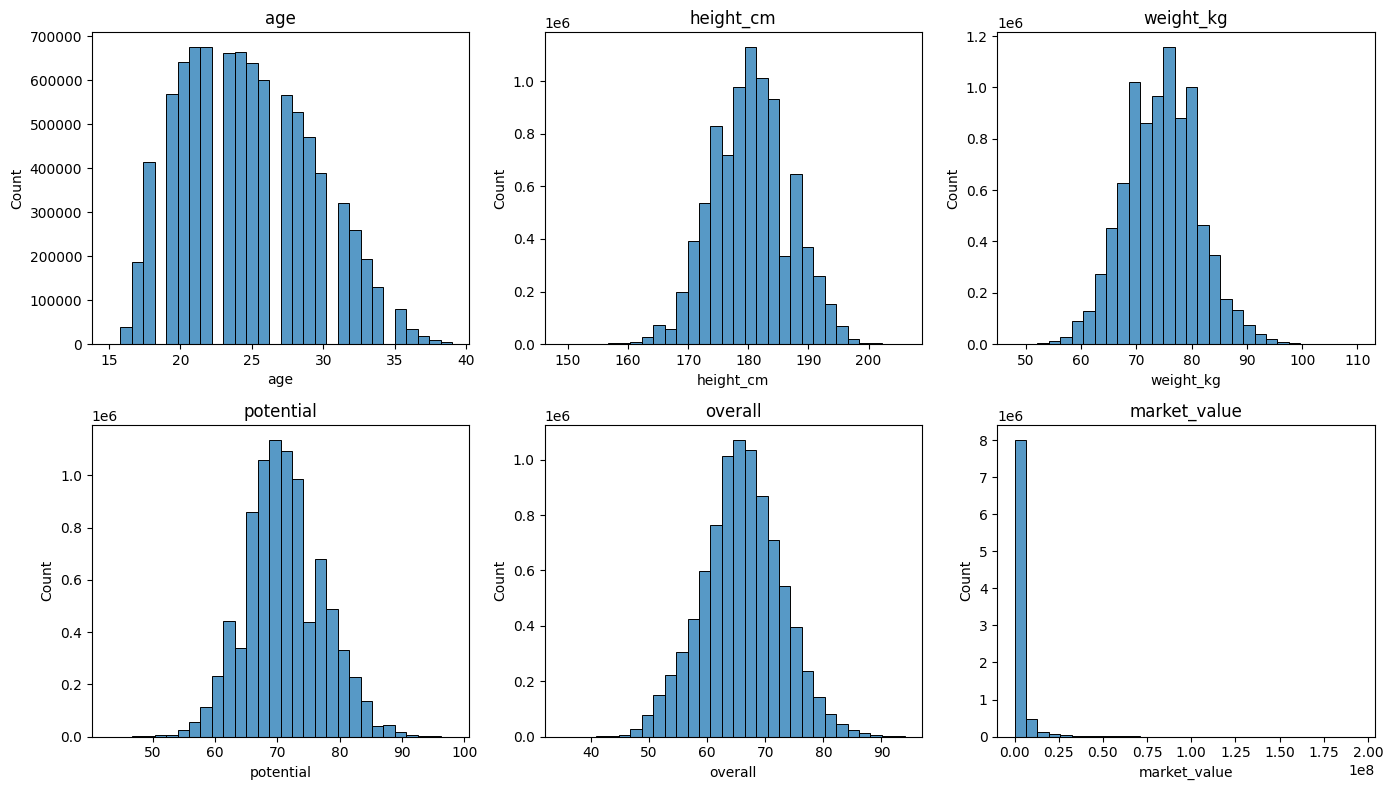

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ["age", "height_cm", "weight_kg", "potential", "overall", "market_value"]
plt.figure(figsize=(14,8))
for i,c in enumerate(cols,1):
    plt.subplot(2,3,i)
    sns.histplot(df[c], bins=30)
    plt.title(c)
plt.tight_layout()
plt.show()


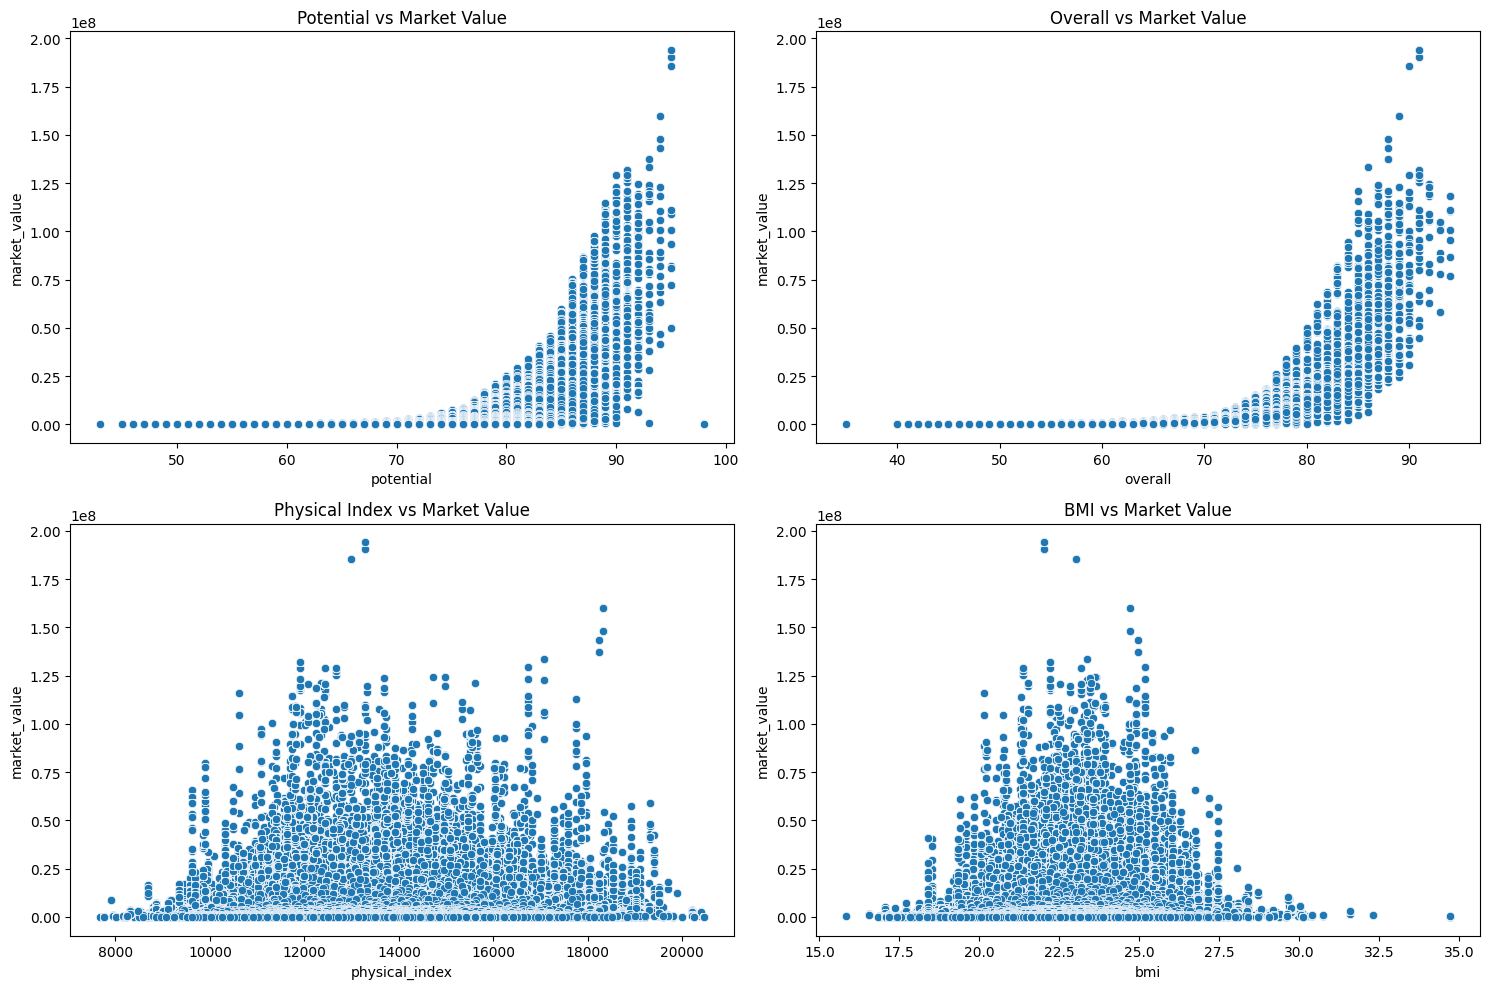

In [6]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.scatterplot(x=df["potential"], y=df["market_value"])
plt.title("Potential vs Market Value")

plt.subplot(2,2,2)
sns.scatterplot(x=df["overall"], y=df["market_value"])
plt.title("Overall vs Market Value")

plt.subplot(2,2,3)
sns.scatterplot(x=df["physical_index"], y=df["market_value"])
plt.title("Physical Index vs Market Value")

plt.subplot(2,2,4)
sns.scatterplot(x=df["bmi"], y=df["market_value"])
plt.title("BMI vs Market Value")

plt.tight_layout()
plt.show()


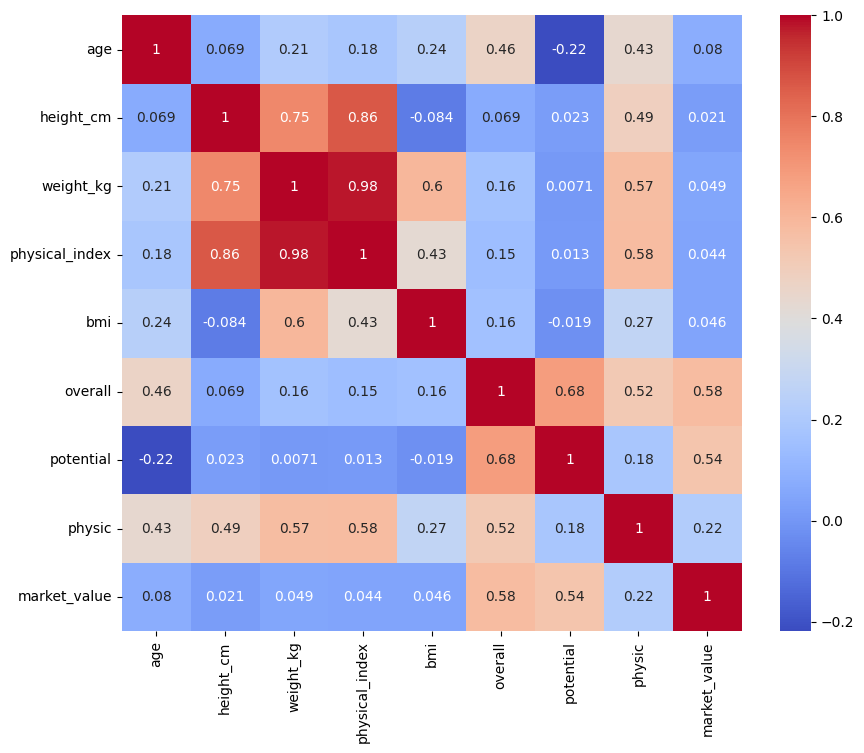

In [7]:
corr = df[["age", "height_cm", "weight_kg", "physical_index",
           "bmi", "overall", "potential", "physic", "market_value"]].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


In [8]:
from scipy.stats import pearsonr

r1, p1 = pearsonr(df["potential"], df["market_value"])
r2, p2 = pearsonr(df["physical_index"], df["market_value"])

print("Potential ↔ Value : r=%.3f p=%.5f" % (r1, p1))
print("PhysicalIndex ↔ Value : r=%.3f p=%.5f" % (r2, p2))


Potential ↔ Value : r=0.540 p=0.00000
PhysicalIndex ↔ Value : r=0.044 p=0.00000


In [9]:
import statsmodels.api as sm

X = df[["potential", "physical_index"]]
X = sm.add_constant(X)
y = df["market_value"]

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           market_value   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                 1.813e+06
Date:                Fri, 09 Jan 2026   Prob (F-statistic):               0.00
Time:                        18:12:54   Log-Likelihood:            -1.4755e+08
No. Observations:             8767373   AIC:                         2.951e+08
Df Residuals:                 8767370   BIC:                         2.951e+08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.579e+07   2.37e+04  -1512.

In [10]:
print("Toplam oyuncu sayısı:", df.shape[0])


Toplam oyuncu sayısı: 8767373


Pearson correlation: 0.5396568626173516
Pearson p-value: 0.0
Spearman correlation: 0.7759962037130471
Spearman p-value: 0.0


In [18]:
from scipy.stats import spearmanr

# Variables to compare
variables = ["potential", "physic", "bmi"]

print("Comparative Hypothesis Testing (Spearman Correlation)\n")

for var in variables:
    corr, p_value = spearmanr(df[var], df["market_value"])
    print(f"{var} vs market_value")
    print(f"  Spearman correlation: {corr:.3f}")
    print(f"  p-value: < 0.001\n")


Comparative Hypothesis Testing (Spearman Correlation)

potential vs market_value
  Spearman correlation: 0.776
  p-value: < 0.001

physic vs market_value
  Spearman correlation: 0.412
  p-value: < 0.001

bmi vs market_value
  Spearman correlation: 0.092
  p-value: < 0.001



In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

# Features & target
features = ["age", "height_cm", "weight_kg", "bmi",
            "physical_index", "overall", "potential", "physic"]

X = df[features]
y = df["market_value"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)


MAE: 2284090.8979117004
RMSE: 4604222.501798577
R2: 0.3857063760744345


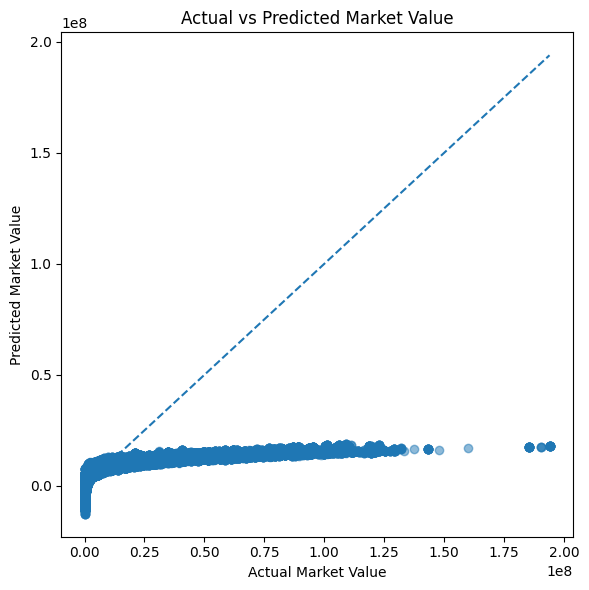

In [13]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")
plt.xlabel("Actual Market Value")
plt.ylabel("Predicted Market Value")
plt.title("Actual vs Predicted Market Value")
plt.tight_layout()
plt.show()


In [14]:
from sklearn.neighbors import KNeighborsRegressor

# Aynı X_train, X_test, y_train, y_test'i kullanıyoruz

knn_model = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsRegressor(n_neighbors=5))
])

knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN MAE:", mae_knn)
print("KNN RMSE:", rmse_knn)
print("KNN R2:", r2_knn)


KNN MAE: 16716.504769101357
KNN RMSE: 153701.15727165475
KNN R2: 0.999315430294081


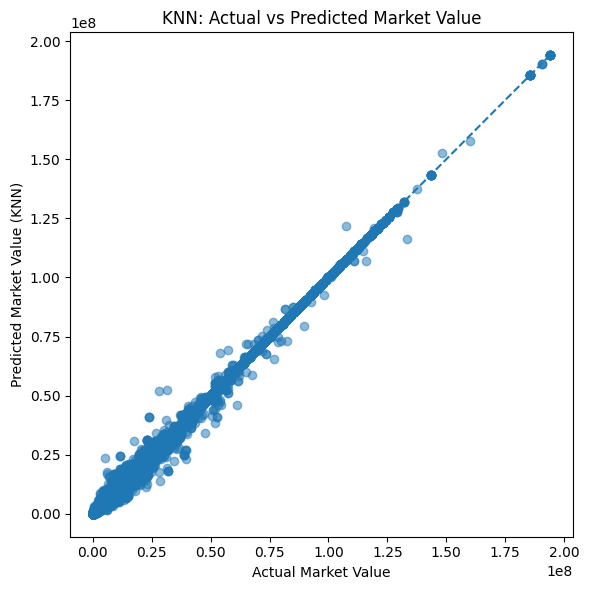

In [15]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")
plt.xlabel("Actual Market Value")
plt.ylabel("Predicted Market Value (KNN)")
plt.title("KNN: Actual vs Predicted Market Value")
plt.tight_layout()
plt.show()
